# Pruebas Adaboost + DecisionTree

El set de training usado se genera desde `lucho/generar_set_test`

Cambios respecto a submit-52:
- DecisionTrees en lugar de RandomForest con criterio cambiado de entropy a gini
- min_samples_split de 1000 a 1200
- n_estimators = 50

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
RANDOM_SEED = 12

In [3]:
entrenamiento = pd.read_csv('/home/luciano/orga-datos/training-set-final.csv').drop_duplicates()

In [4]:
no_postulaciones = entrenamiento[entrenamiento['sepostulo'] == 0].sample(500000, random_state=RANDOM_SEED)
postulaciones    = entrenamiento[entrenamiento['sepostulo'] == 1]

entrenamiento = pd.concat([postulaciones, no_postulaciones]).sample(frac=1)

In [5]:
kaggle_set = pd.read_csv('/home/luciano/orga-datos/test_final_100k-preprocesado.csv')

In [6]:
TEST_SIZE_PERCENT = 0.1

In [7]:
X = entrenamiento.drop(axis=1, labels=['idaviso', 'idpostulante', 'sepostulo'])
y = entrenamiento['sepostulo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

In [8]:
X_kaggle = kaggle_set.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])

In [9]:
clasificador = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(
        min_samples_split=1200,
        criterion = 'gini',
        random_state=RANDOM_SEED
    ),
    n_estimators=50,
    random_state=RANDOM_SEED
)

In [ ]:
clasificador.fit(X_train, y_train)

In [ ]:
y_test_predictd = clasificador.predict_proba(X_test)[:, 1]

In [14]:
roc_auc_score(y_test, y_test_predictd)

0.9928066059115112

In [15]:
clasificador.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]

0.96817

In [ ]:
y_kaggle = clasificador.predict_proba(X_kaggle)[:, 1]

In [ ]:
kaggle_out = kaggle_set[['id']].copy()
kaggle_out['sepostulo'] = y_kaggle

In [ ]:
kaggle_out['sepostulo'].hist()

In [ ]:
kaggle_out.to_csv('/home/luciano/orga-datos/tmp/submits/submit-53.csv', index=False)

In [20]:
kaggle_38 = pd.read_csv('/home/luciano/orga-datos/tmp/submits/submit-38.csv')

In [21]:
print('ROCAUC 38 vs 41:', roc_auc_score(np.round(kaggle_38['sepostulo']), kaggle_out['sepostulo']))

ROCAUC 38 vs 41: 0.9958793798702135


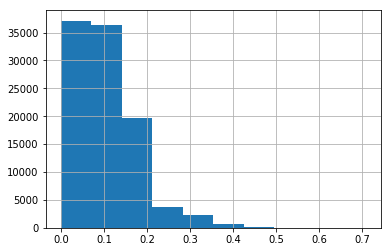

In [22]:
np.abs(kaggle_38['sepostulo'] - kaggle_out['sepostulo']).hist()

In [ ]:
# kaggle score: 0.85